# BÀI TẬP THỰC HÀNH 2: TRỰC QUAN HÓA DỮ LIỆU BỆNH TIỂU ĐƯỜNG
Mục tiêu: Thực hành các kỹ thuật trực quan hóa để phân tích các yếu tố y tế liên quan đến bệnh tiểu đường.

## Bài làm

### 1. Chuẩn bị dữ liệu cho trực quan hóa dữ liệu
Tải dữ liệu và các thư viện cần thiết.

In [6]:
# Import các thư viện
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Tải dữ liệu từ file CSV
df_diabetes = pd.read_csv(r"..\data\diabetes.csv", encoding='utf-8')


# Kiểm tra 5 dòng dữ liệu đầu tiên
df_diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Phân tích: Dữ liệu chứa 8 thuộc tính y tế (ví dụ: Glucose, BMI, Age) và một cột Outcome (Kết quả), trong đó 1 là có bệnh và 0 là không có bệnh.

### 2. Trực quan hóa dữ liệu với thư viện Matplotlib


2.1. Case 1 & 2: Vẽ biểu đồ cơ bản và nâng cao<br>
Thay vì so sánh giá, chúng ta hãy so sánh giá trị trung bình của các chỉ số y tế giữa hai nhóm: người có bệnh (Outcome=1) và người không có bệnh (Outcome=0).<br>
Trước tiên, chúng ta cần chuẩn bị dữ liệu bằng cách nhóm và tính trung bình.

In [2]:
# Bước 1: Chuẩn bị dữ liệu
# Nhóm theo 'Outcome' và tính trung bình cho các cột khác
outcome_means = df_diabetes.groupby('Outcome').mean()

# Chọn một chỉ số để vẽ, ví dụ 'Glucose'
glucose_means = outcome_means['Glucose']

# Dữ liệu cho trục x và y
x_labels = ['Không bệnh (0)', 'Có bệnh (1)']
y_values = glucose_means.values


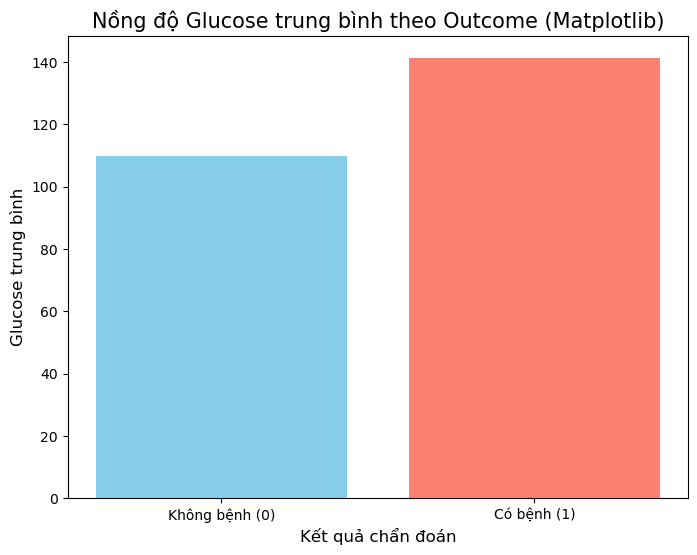

In [3]:
# Bước 2: Vẽ biểu đồ cột
plt.figure(figsize=(8, 6))
plt.bar(x_labels, y_values, color=['skyblue', 'salmon'])

# Thêm tiêu đề và nhãn
plt.title('Nồng độ Glucose trung bình theo Outcome (Matplotlib)', fontsize=15)
plt.xlabel('Kết quả chẩn đoán', fontsize=12)
plt.ylabel('Glucose trung bình', fontsize=12)
plt.yticks(fontsize=10)

plt.show()

Phân tích:<br>
Chúng ta đã sử dụng groupby().mean() để chuẩn bị dữ liệu, một bước cần thiết khi dùng Matplotlib cho loại phân tích này.<br>
Biểu đồ cho thấy rõ ràng nhóm người có bệnh (Outcome=1) có nồng độ Glucose trung bình cao hơn đáng kể so với nhóm không có bệnh.

2.2. Case 3: Xem nhiều góc nhìn cùng lúc<br>
Chúng ta sẽ dùng subplots để so sánh đồng thời nhiều chỉ số quan trọng giữa hai nhóm. Ví dụ: Glucose, BMI, và Age.

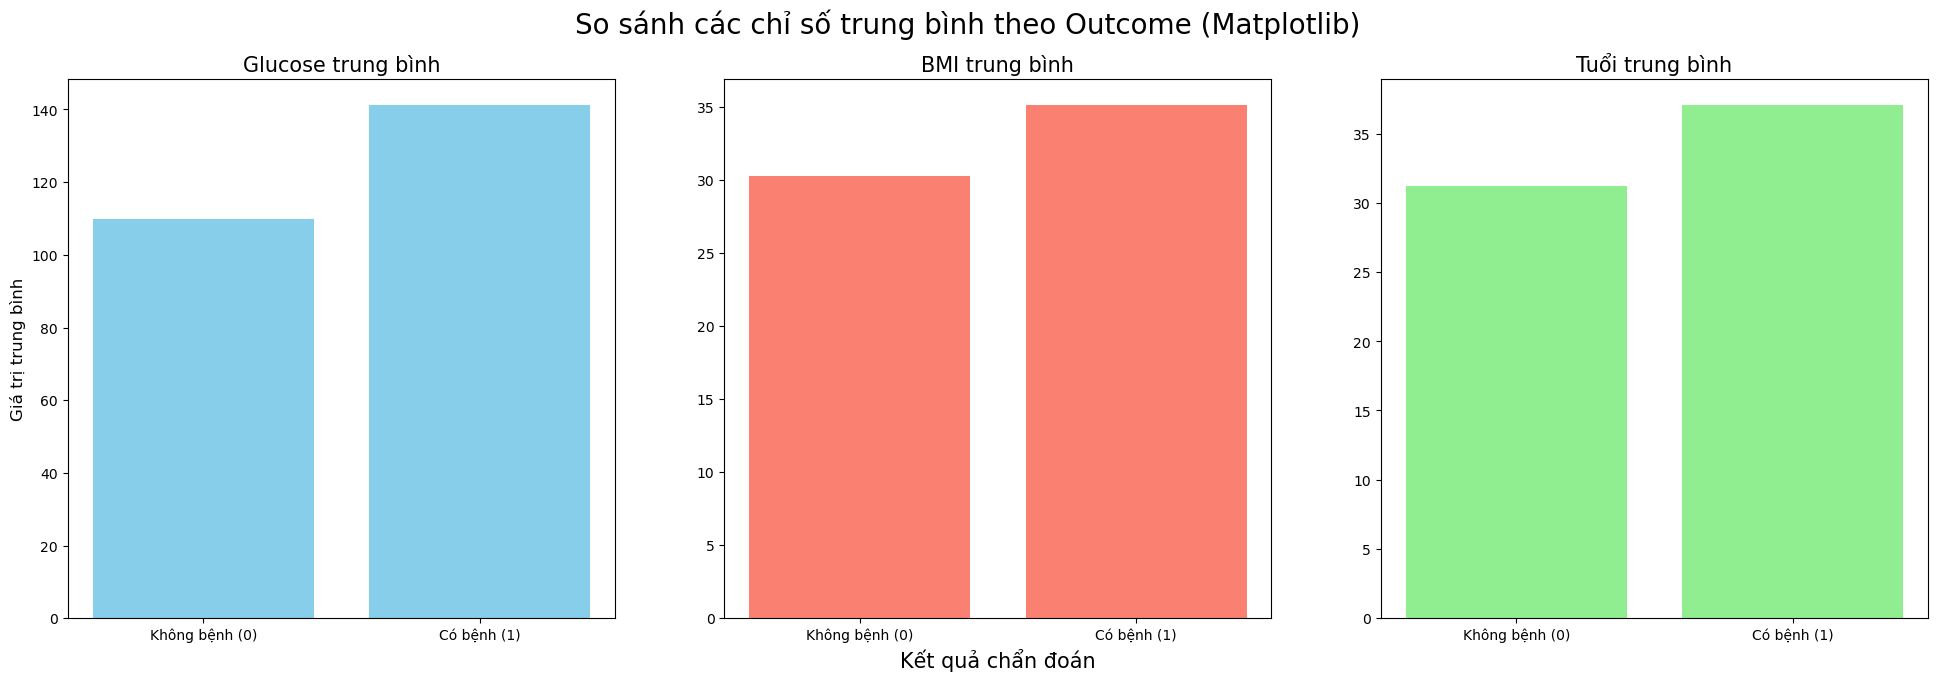

In [15]:
# Dữ liệu đã chuẩn bị từ trước (outcome_means)

# Tạo khung chứa 3 biểu đồ con
fig, ax = plt.subplots(1, 3, figsize=(24, 7))
fig.suptitle('So sánh các chỉ số trung bình theo Outcome (Matplotlib)', fontsize=20)

# ----- Biểu đồ 1: Glucose -----
ax[0].bar(x_labels, outcome_means['Glucose'], color='skyblue')
ax[0].set_title('Glucose trung bình', fontsize=15)
ax[0].set_ylabel('Giá trị trung bình', fontsize=12)

# ----- Biểu đồ 2: BMI -----
ax[1].bar(x_labels, outcome_means['BMI'], color='salmon')
ax[1].set_title('BMI trung bình', fontsize=15)
ax[1].set_xlabel('Kết quả chẩn đoán', fontsize=15)

# ----- Biểu đồ 3: Age -----
ax[2].bar(x_labels, outcome_means['Age'], color='lightgreen')
ax[2].set_title('Tuổi trung bình', fontsize=15)

plt.show()

Phân tích:<br>
Kỹ thuật subplots của Matplotlib được áp dụng thành công.<br>
Dashboard này cho phép so sánh nhanh: nhóm người mắc bệnh không chỉ có Glucose cao hơn, mà còn có BMI và Tuổi trung bình cao hơn.

### 3. Trực quan hóa dữ liệu với thư viện Seaborn
Bây giờ, chúng ta sẽ thực hiện lại các tác vụ trên bằng Seaborn.


Case 1 & 2: Vẽ biểu đồ cơ bản và nâng cao

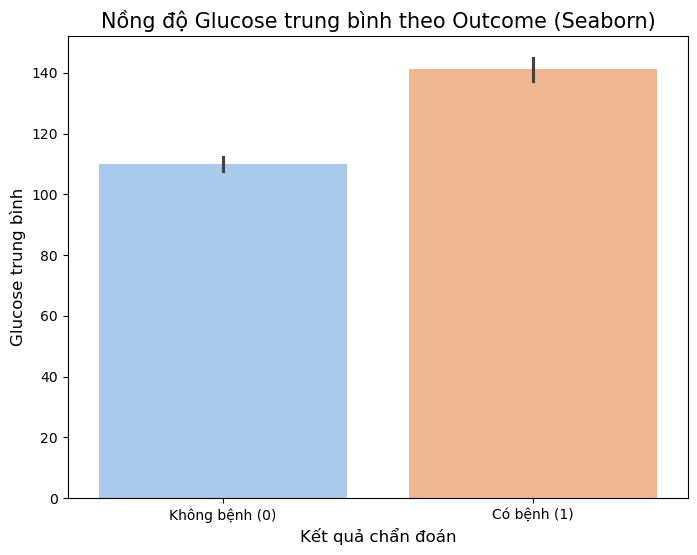

In [16]:
# Seaborn tự động tính toán giá trị trung bình khi dùng barplot
plt.figure(figsize=(8, 6))
ax_sns = sns.barplot(x='Outcome', y='Glucose', data=df_diabetes, palette='pastel', hue='Outcome', legend=False) 

# Tùy chỉnh nhãn
ax_sns.set_title('Nồng độ Glucose trung bình theo Outcome (Seaborn)', fontsize=15)
ax_sns.set_xlabel('Kết quả chẩn đoán', fontsize=12)
ax_sns.set_ylabel('Glucose trung bình', fontsize=12)
ax_sns.set_xticks(ticks=[0, 1], labels=['Không bệnh (0)', 'Có bệnh (1)'])

plt.show()


Case 3: Xem nhiều biểu đồ cùng lúc

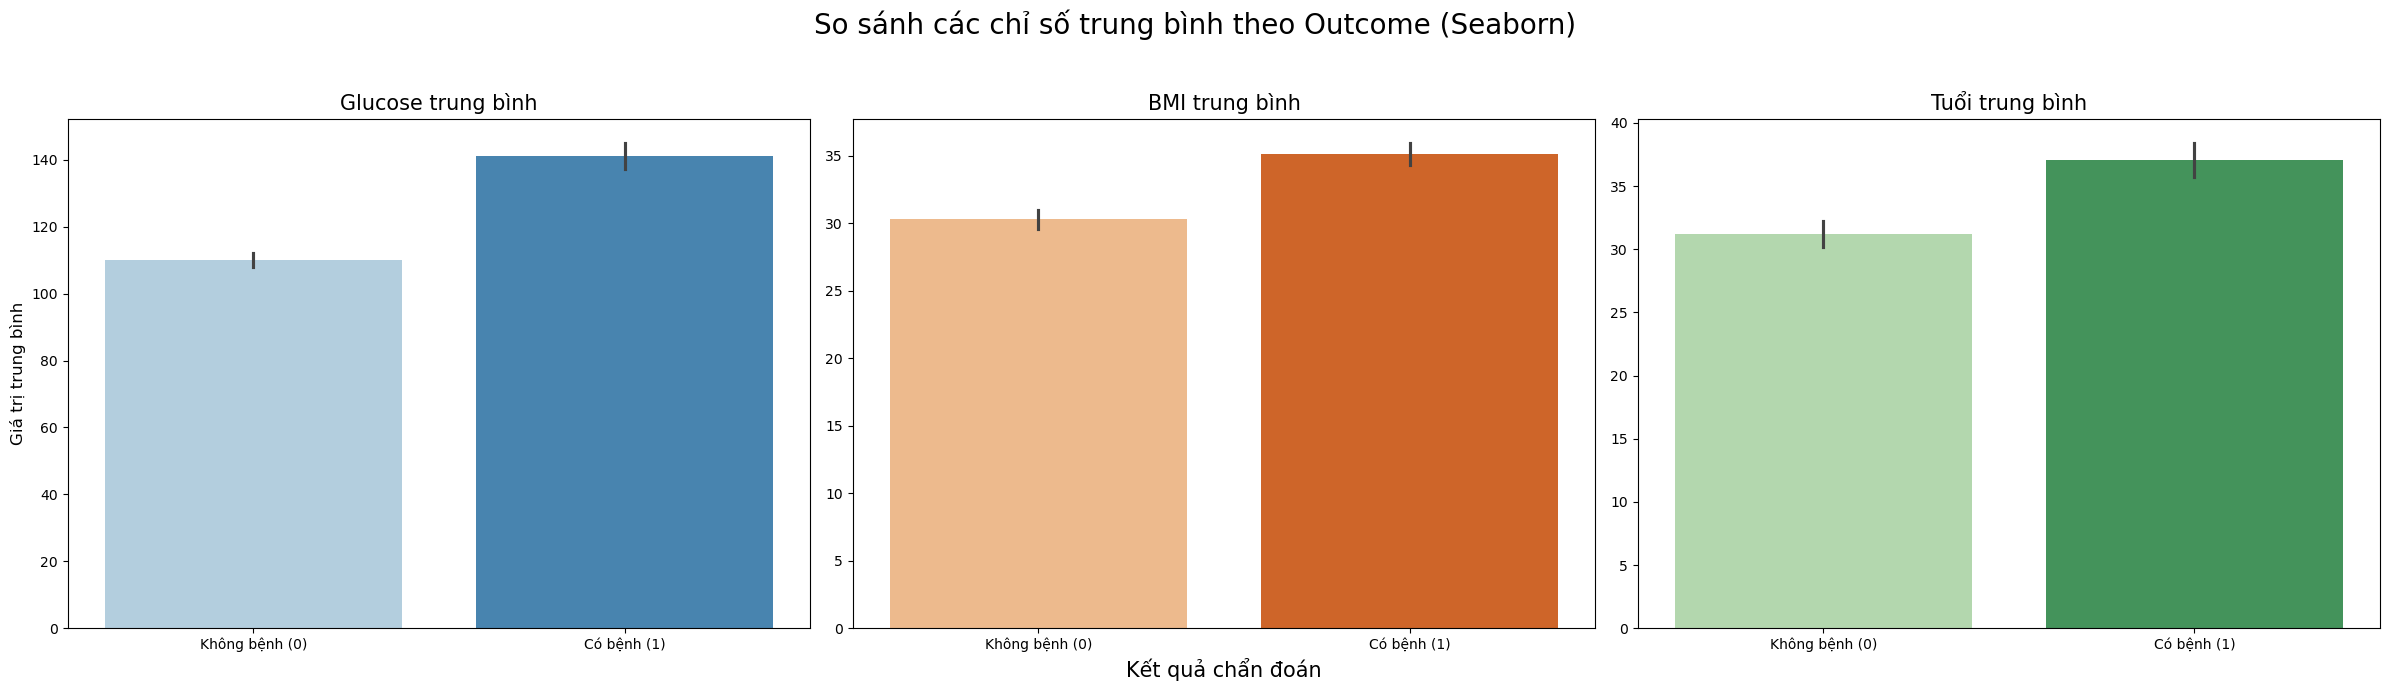

In [14]:
fig, ax = plt.subplots(1, 3, figsize=(24, 7))
fig.suptitle('So sánh các chỉ số trung bình theo Outcome (Seaborn)', fontsize=20)

# ----- Biểu đồ 1: Glucose -----
sns.barplot(x='Outcome', y='Glucose', data=df_diabetes, ax=ax[0], palette='Blues', 
            hue='Outcome', legend=False) # Sửa ở đây
ax[0].set_title('Glucose trung bình', fontsize=15)
ax[0].set_xlabel('')
ax[0].set_ylabel('Giá trị trung bình', fontsize=12)
# Sửa ở đây: Đặt cả ticks và labels cùng lúc
ax[0].set_xticks(ticks=[0, 1], labels=['Không bệnh (0)', 'Có bệnh (1)'])

# ----- Biểu đồ 2: BMI -----
sns.barplot(x='Outcome', y='BMI', data=df_diabetes, ax=ax[1], palette='Oranges', 
            hue='Outcome', legend=False) # Sửa ở đây
ax[1].set_title('BMI trung bình', fontsize=15)
ax[1].set_xlabel('Kết quả chẩn đoán', fontsize=15)
ax[1].set_ylabel('')
# Sửa ở đây
ax[1].set_xticks(ticks=[0, 1], labels=['Không bệnh (0)', 'Có bệnh (1)'])

# ----- Biểu đồ 3: Age -----
sns.barplot(x='Outcome', y='Age', data=df_diabetes, ax=ax[2], palette='Greens', 
            hue='Outcome', legend=False) # Sửa ở đây
ax[2].set_title('Tuổi trung bình', fontsize=15)
ax[2].set_xlabel('')
ax[2].set_ylabel('')
# Sửa ở đây
ax[2].set_xticks(ticks=[0, 1], labels=['Không bệnh (0)', 'Có bệnh (1)'])

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

## Kết thức